In [204]:
#Importing libraries
from tweepy import OAuthHandler
from tweepy import Cursor
from tweepy import API
import pandas as pd
import re
from textblob import TextBlob
from wordcloud import WordCloud
import twitter_login
import matplotlib.pyplot as plt

In [213]:
# Getting twitter Authentication credentials from twitter_login.py
auth=OAuthHandler(twitter_login.CONSUMER_KEY,twitter_login.CONSUMER_SECRET)
auth.set_access_token(twitter_login.ACCESS_TOKEN,twitter_login.ACCESS_TOKEN_SECRET)

# Create API object
api=API(auth,wait_on_rate_limit=True)

# Extracting 200 tweets from user
searchAbout=input("Enter a product name:  ")
no_of_Tweets=int(input("Enter no of Tweets  :  "))
posts=Cursor(api.search, q=searchAbout, lang="en", since="2020-01-01").items(no_of_Tweets)

Enter a product name:  Samsung
Enter no of Tweets  :  100


In [214]:
#Creating a dataframe with a column called Tweets
df=pd.DataFrame([tweet.text for tweet in posts],columns=['Tweets'])

#Showing data
df

,Tweets
0,Question of The Day (sponsored by @Samsung_Gha...
1,Samsung 80 cm (32 inches) Wondertainment Serie...
2,RT @RakJhun: DYK that in the South Korea stock...
3,Stop South Korean dog/cat meat industry! 😿😢😭✊ ...
4,RT @FremantleHQ: The Baywatch Channel is now l...
...,...
95,"#Harman, a connected #technologysolutions pro..."
96,@OmarEstietie @odybeatfanN95 @Soham2077 @Samsu...
97,Samsung raises non-memory chip investment targ...
98,RT @Akalyadurai27: I vote #Dynamite by @BTS_tw...


In [215]:
#Removing un usefull words and symbols from the Tweets
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9_s:s]+','',text)     # Removed @...
    text=re.sub(r'#[A-Za-z0-9_s:s]+','',text)     # Removed #...
    text=re.sub(r'hmm ','',text)                   # Removed huu
    text=re.sub(r'[Hh]i ','',text)                 # Removed Hi
    text=re.sub(r'and ','',text)                   # Removed and
    text=re.sub(r'oh ','',text)                   # Removed oh
    text=re.sub(r'via ','',text)                  # Removed via
    text=re.sub(r'RT[\s]+','',text)               # Removed RT
    text=re.sub(r'https[:s]\/\/\S+','',text)      # Removed https link
    return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df                                                #Showing cleaned text

,Tweets
0,Question of The Day (sponsored by )\n\nYou get...
1,Samsung 80 cm (32 inches) Wondertainment Serie...
2,"DYK that in the South Korea stock market, near..."
3,Stop South Korean dog/cat meat industry! 😿😢😭✊ ...
4,The Baywatch Channel is now live on Samsung TV...
...,...
95,", a connected provider of Samsung has set up..."
96,Pain 🥲
97,Samsung raises non-memory chip investment targ...
98,I vote by for at the 2021 \n \n\nMe everyti...


In [216]:
# Creat a fun. to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creat a fun. to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creat two new columns
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)

# Show the new dataframe with the new columns
df

,Tweets,Subjectivity,Polarity
0,Question of The Day (sponsored by )\n\nYou get...,0.000000,0.000000
1,Samsung 80 cm (32 inches) Wondertainment Serie...,0.571429,0.207143
2,"DYK that in the South Korea stock market, near...",0.300000,0.100000
3,Stop South Korean dog/cat meat industry! 😿😢😭✊ ...,0.000000,0.000000
4,The Baywatch Channel is now live on Samsung TV...,0.500000,-0.056818
...,...,...,...
95,", a connected provider of Samsung has set up...",0.000000,0.000000
96,Pain 🥲,0.000000,0.000000
97,Samsung raises non-memory chip investment targ...,0.500000,0.000000
98,I vote by for at the 2021 \n \n\nMe everyti...,0.000000,0.000000


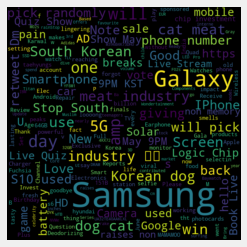

In [217]:
# Plot the  word cloud
allWords=''.join( [twts for twts in df['Tweets']])
wc=WordCloud(width=800, height=800, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [218]:
# Creat a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df['Analysis']=df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Question of The Day (sponsored by )\n\nYou get...,0.000000,0.000000,Neutral
1,Samsung 80 cm (32 inches) Wondertainment Serie...,0.571429,0.207143,Positive
2,"DYK that in the South Korea stock market, near...",0.300000,0.100000,Positive
3,Stop South Korean dog/cat meat industry! 😿😢😭✊ ...,0.000000,0.000000,Neutral
4,The Baywatch Channel is now live on Samsung TV...,0.500000,-0.056818,Negative
...,...,...,...,...
95,", a connected provider of Samsung has set up...",0.000000,0.000000,Neutral
96,Pain 🥲,0.000000,0.000000,Neutral
97,Samsung raises non-memory chip investment targ...,0.500000,0.000000,Neutral
98,I vote by for at the 2021 \n \n\nMe everyti...,0.000000,0.000000,Neutral


In [219]:
# Print all positive tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Positive"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ptweets=j-1;

1)Samsung 80 cm (32 inches) Wondertainment Series HD Ready LED Smart TV UA32TE40AAKLXL (Titan Gray) (2021 model) 

2)DYK that in the South Korea stock market, nearly 2/3rd of the volume is contributed by teenagers. A 12-year old child has rake…

3)Love the fact tht taehyungs impact is so powerful,he makes hyundai cars went viral&amp;reaching peaks in sales, his selfie…

4)[Components] WTB: Any, IBM 32GB 4KX72 SAMSUNG, M396B4K73DH0-YF8M1, Used, Offers EUR  … 

5)Good thing we have our  its loooong lasting battery life to play mobile games during breaks! 
Get your Gala…

6)Samsung raises spending in logic chip businesses to $151 billion (ZDNet Latest News) 

7)With Samsung Deodorizing setting one can say goodbye lingering smells hello to tasty fresh food by selectin… 

8)MAMAMOO Solar will be on "Galaxy Book Live Quiz Show" 

📅 May 14 
⏰ 9PM KST 

Live Stream:
🔗
🔗https…

9)With Samsung Deodorizing setting one can say goodbye lingering smells hello to tasty fresh food by selectin… 

10)Yo

In [220]:
# Print all negative tweets
j=1
for i in range(0, df.shape[0]):
    if(df['Analysis'][i]== "Negative"):
        print(str(j)+')'+df['Tweets'][i]+'\n')
        j=j+1
ntweets=j-1;

1)The Baywatch Channel is now live on Samsung TV Plus 🏖 📺 No more channel surfing – you can dive in to all your favourite Ba…

2)Dude trying to use jiggle bird back then on my Samsung Galaxy Ace fried the battery partially melted my SD c…

3)[FINALS] Birthday June
 

20💙❤️x50 votes a day 
Prize: Wide AD Samsung station
Ends: 05.20 18pm kst
Current position…

4) 
105 days without a working American f/f broken by Samsung engineers when doing warranty repair nrly 3 w… 

5)with a little sunshine for your day. 💜   5G  

6) Samsung bruh. The screen all mess up

7)Just Pinned to our products: Star Wars Game Of Thrones case for Samsung Galaxy s5 s6 s7 edge s4 Phone Cover for iph… 

8)Samsung heir Jay Y. Lee is going back to jail for bribery:    ht  

9) "If you're hoping to see Fuchsia products release soon, sorry to disappoint, but at least Samsung… 



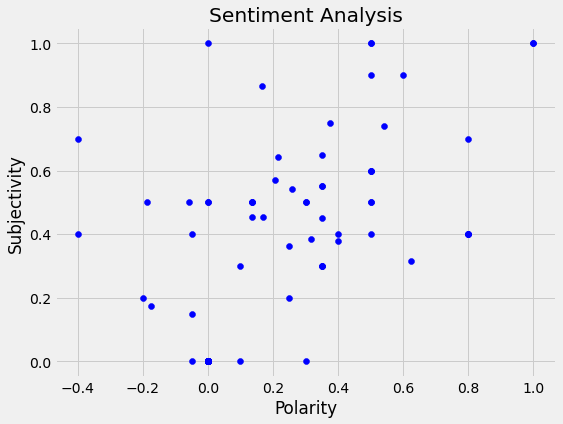

In [221]:
# Plot the Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [222]:
# Get the percentage of positive tweets
print('Percentage of Positive tweets:')
round((ptweets/df.shape[0])*100,1)

Percentage of Positive tweets:


46.0

In [223]:
# Get the percentage of negative tweets
print('Percentage of Negative tweets:')
round((ntweets/df.shape[0])*100,1)

Percentage of Negative tweets:


9.0

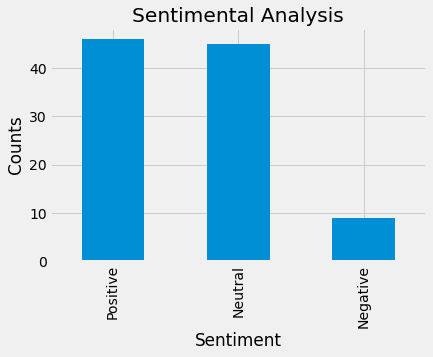

In [224]:
# Plot and visualize the counts of sentimental analysis
plt.title('Sentimental Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()